In [105]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from itertools import permutations
import seaborn as sns

In [18]:
X, Y = fetch_openml("emotions", version=4, return_X_y=True)
X, Y = X.to_numpy(), Y.to_numpy()
Y = (Y == 'TRUE').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

In [51]:
def subset_accuracy(y_real, y_pred):
    assert y_real.shape == y_pred.shape
    correct_pred = np.sum(np.all(y_real == y_pred, axis=1))
    sub_acc = correct_pred / y_real.shape[0]
    return sub_acc

In [59]:
def hamming_score(y_real, y_pred):
    correct_pred = (y_real == y_pred).sum()
    hamm_sc = correct_pred / (y_real.shape[0] * y_real.shape[1])
    return hamm_sc

## Binary Relevance

In [25]:
br_models = []
for col in range(Y.shape[1]):
    y_train_col = y_train[:, col]
    model_col = AdaBoostClassifier()
    model_col.fit(X_train, y_train_col)
    br_models.append(model_col)

In [43]:
y_pred_br = []
for col, model in enumerate(br_models):
    y_pred_col = model.predict(X_test)
    y_pred_br.append(y_pred_col.reshape((-1, 1)))
y_pred_br = np.concat(y_pred_br, axis=1)

In [60]:
subset_accuracy(y_test, y_pred_br)

np.float64(0.24369747899159663)

In [61]:
hamming_score(y_test, y_pred_br)

np.float64(0.8025210084033614)

## Classifier Chains

In [89]:
class ChainClassifier():
    def __init__(self):
        self.chain_models = []

    def fit(self, X_train, y_train, cls_order = None):
        if cls_order is None:
            cls_order = range(y_train.shape[1])
        y_pred_train_chain = []
        chain_models = []
        for col in cls_order:
            X_iter_train = np.concat([X_train] + y_pred_train_chain, axis=1)
            model_col = AdaBoostClassifier()
            model_col.fit(X_iter_train, y_train[:, col])
            chain_models.append(model_col)
            y_iter_train_pred = model_col.predict(X_iter_train)
            y_pred_train_chain.append(y_iter_train_pred.reshape((-1, 1)))
        self.chain_models = chain_models

    def predict(self, X_test):
        y_pred_test_chain = []
        for col, model in enumerate(chain_models):
            X_iter_test = np.concat([X_test] + y_pred_test_chain, axis=1)
            y_iter_test_pred = model.predict(X_iter_test)
            y_pred_test_chain.append(y_iter_test_pred.reshape((-1, 1)))
        y_pred_chain = np.concat(y_pred_test_chain, axis=1)
        return y_pred_chain

In [104]:
chain_sub_acc = []
chain_humm_score = []

all_perms = permutations(range(y_train.shape[1]))
all_perms_len = len(list(all_perms))
all_perms = permutations(range(y_train.shape[1]))
for idx, cls_order in enumerate(all_perms):
    if idx % 10 == 0:
        print(f'{idx} / {all_perms_len}')
    chain_clf = ChainClassifier()
    chain_clf.fit(X_train, y_train, cls_order)
    y_pred_clf = chain_clf.predict(X_test)
    chain_sub_acc.append(subset_accuracy(y_test, y_pred_clf))
    chain_humm_score.append(hamming_score(y_test, y_pred_clf))

0 / 720
10 / 720
20 / 720
30 / 720
40 / 720
50 / 720
60 / 720
70 / 720
80 / 720
90 / 720
100 / 720
110 / 720
120 / 720
130 / 720
140 / 720
150 / 720
160 / 720
170 / 720
180 / 720
190 / 720
200 / 720
210 / 720
220 / 720
230 / 720
240 / 720
250 / 720
260 / 720
270 / 720
280 / 720
290 / 720
300 / 720
310 / 720
320 / 720
330 / 720
340 / 720
350 / 720
360 / 720
370 / 720
380 / 720
390 / 720
400 / 720
410 / 720
420 / 720
430 / 720
440 / 720
450 / 720
460 / 720
470 / 720
480 / 720
490 / 720
500 / 720
510 / 720
520 / 720
530 / 720
540 / 720
550 / 720
560 / 720
570 / 720
580 / 720
590 / 720
600 / 720
610 / 720
620 / 720
630 / 720
640 / 720
650 / 720
660 / 720
670 / 720
680 / 720
690 / 720
700 / 720
710 / 720


<Axes: ylabel='Count'>

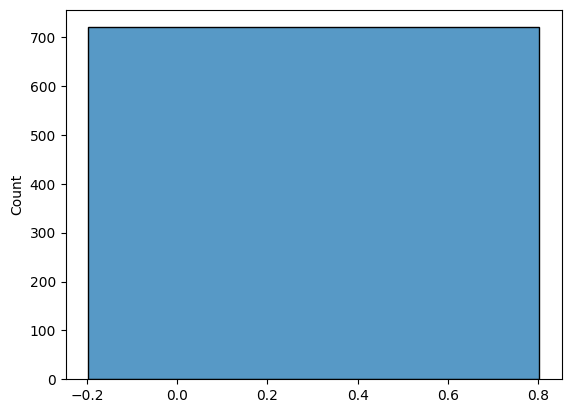

In [106]:
sns.histplot(chain_sub_acc)

<Axes: ylabel='Count'>

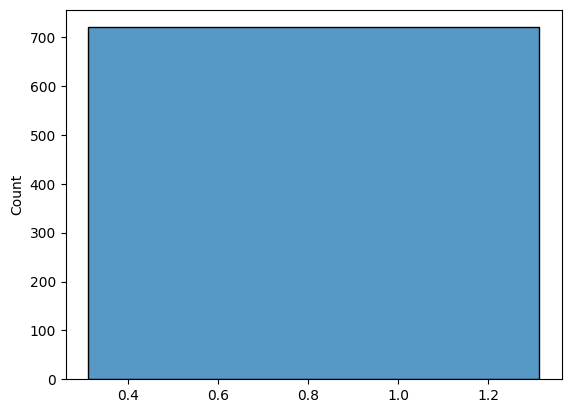

In [108]:
sns.histplot(chain_humm_score)

In [110]:
chain_sub_acc

[np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float64(0.3025210084033613),
 np.float6

## ECC

In [63]:
cls_order

range(0, 6)